<div style="
  background: linear-gradient(90deg, #222e42ff, #d8aee4ff);
  padding: 16px;
  border-radius: 8px;
  color: #ffffff;
  font-family: Arial, sans-serif;
">

  <h2 style="margin: 0 0 8px 0;">
    Pract – 1: Introduction to Python & Libraries
  </h2>

  <p style="margin: 0; font-size: 14px; line-height: 1.5;">
    • Setup Python with NumPy, Pandas, Scikit-Learn<br/>
    • Load dataset & perform basic data manipulation<br/>
    • Build and evaluate a simple Linear Regression model<br/>
    • Plot regression line and assess performance
  </p>

</div>


## Import libraries and load data

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [12]:
df = pd.read_csv('house_prices_practice.csv')
df.head()

,Id,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,YearBuilt,FullBath,BedroomAbvGr,LotArea,SalePrice
0,1,7,1560,0,1658,1969,2,1,8059,177106
1,2,4,2827,2,1319,2012,3,4,13530,301044
2,3,8,3920,0,841,2010,1,4,9010,360609
3,4,5,3044,0,1058,1998,0,4,13207,240556
4,5,7,801,1,2428,2020,0,1,9117,193656


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Id            300 non-null    int64
 1   OverallQual   300 non-null    int64
 2   GrLivArea     300 non-null    int64
 3   GarageCars    300 non-null    int64
 4   TotalBsmtSF   300 non-null    int64
 5   YearBuilt     300 non-null    int64
 6   FullBath      300 non-null    int64
 7   BedroomAbvGr  300 non-null    int64
 8   LotArea       300 non-null    int64
 9   SalePrice     300 non-null    int64
dtypes: int64(10)
memory usage: 23.6 KB


## Prepare X and y

In [14]:
X = np.array(df[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt', 'FullBath', 'LotArea', 'BedroomAbvGr']])
y = np.array(df['SalePrice'])

## Split-train and test data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

## Train the model

In [16]:
reg = LinearRegression()
model = reg.fit(X_train, y_train)

In [17]:
model.coef_, model.intercept_

(array([1.19480714e+04, 5.49995632e+01, 1.89749449e+04, 2.47919874e+01,
        7.71915859e+02, 1.06274440e+04, 5.72936672e-02, 4.81125794e+03]),
 -1563610.968759173)

## Evaluate the model

In [18]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MAE: {} MSE: {} RMSE: {} R^2 {}'.format(mae, mse, rmse, r2))

MAE: 9126.552091883941 MSE: 112141682.71609433 RMSE: 112141682.71609433 R^2 0.9822737483739534


## Visualize results

Text(0, 0.5, 'y-actual')

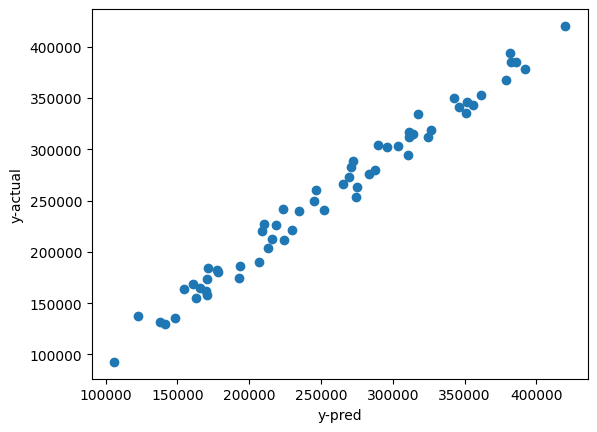

In [19]:
plt.scatter(y_pred, y_test)
plt.xlabel('y-pred')
plt.ylabel('y-actual')